In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('C:/64/Week_9/SimpleLinear_Regression/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print(df.isnull().sum())
df['TV']=df['TV'].fillna(df['TV'].mean())
df['Radio']=df['Radio'].fillna(df['Radio'].mean())
df['Newspaper']=df['Newspaper'].fillna(df['Newspaper'].mean())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
x=df[['TV','Radio','Newspaper']].values
y=df['Sales'].values
x,y

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5],
        [180.8,  10.8,  58.4],
        [  8.7,  48.9,  75. ],
        [ 57.5,  32.8,  23.5],
        [120.2,  19.6,  11.6],
        [  8.6,   2.1,   1. ],
        [199.8,   2.6,  21.2],
        [ 66.1,   5.8,  24.2],
        [214.7,  24. ,   4. ],
        [ 23.8,  35.1,  65.9],
        [ 97.5,   7.6,   7.2],
        [204.1,  32.9,  46. ],
        [195.4,  47.7,  52.9],
        [ 67.8,  36.6, 114. ],
        [281.4,  39.6,  55.8],
        [ 69.2,  20.5,  18.3],
        [147.3,  23.9,  19.1],
        [218.4,  27.7,  53.4],
        [237.4,   5.1,  23.5],
        [ 13.2,  15.9,  49.6],
        [228.3,  16.9,  26.2],
        [ 62.3,  12.6,  18.3],
        [262.9,   3.5,  19.5],
        [142.9,  29.3,  12.6],
        [240.1,  16.7,  22.9],
        [248.8,  27.1,  22.9],
        [ 70.6,  16. ,  40.8],
        [292.9,  28.3,  43.2],
        [112.9,  17.4,  38.6],
        

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('Training samples:', x_train.shape[0])
print('Test samples:', x_test.shape[0])

Training samples: 160
Test samples: 40


In [6]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [7]:
data=np.array([[150,20,30]])
prediction=model.predict(data)
print('Predicted Sales for TV=150, Radio=20, Newspaper=30:', prediction[0])

Predicted Sales for TV=150, Radio=20, Newspaper=30: 14.950388344297032


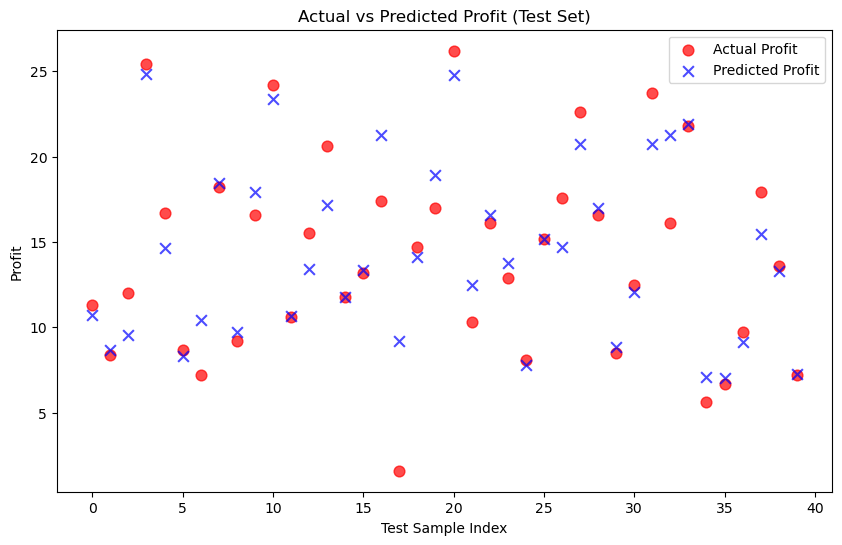

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

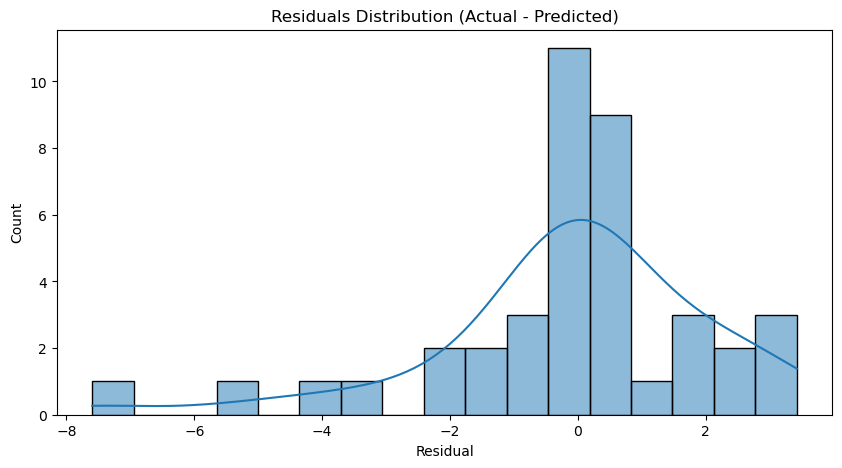

In [9]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()

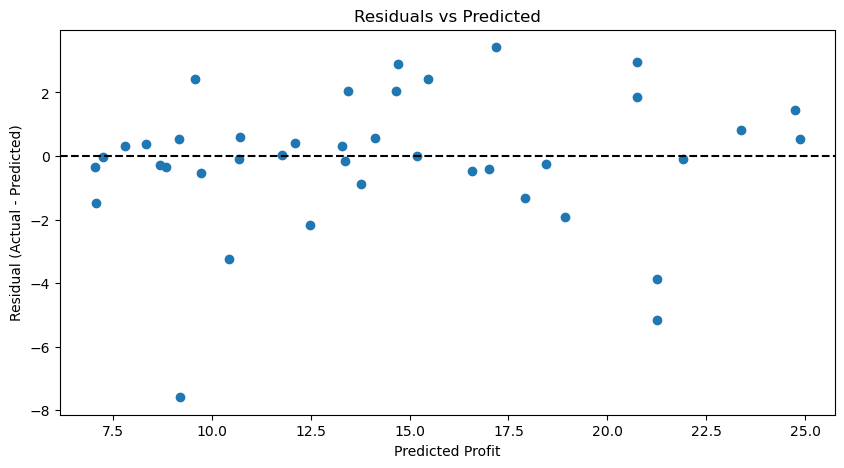

In [10]:
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

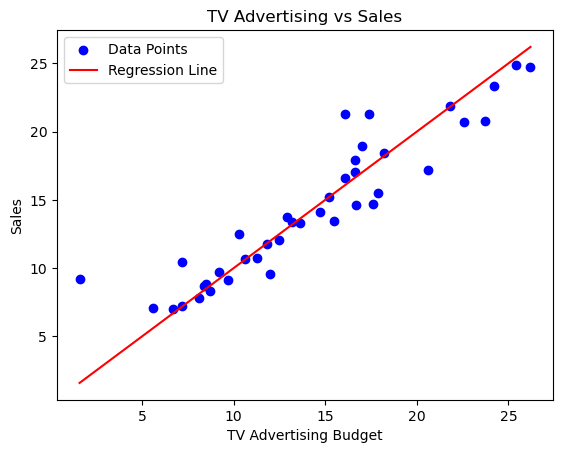

In [11]:
plt.scatter(y_test,y_pred,color='blue',label='Data Points')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()

In [12]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 4.522552562041289
R^2 Score: 0.8645053923967725
